# Introduction

Since Jan. 1, 2015, [The Washington Post](https://www.washingtonpost.com/) has been compiling a database of every fatal shooting in the US by a police officer in the line of duty.

<center><img src=https://i.imgur.com/sX3K62b.png></center>

While there are many challenges regarding data collection and reporting, The Washington Post has been tracking more than a dozen details about each killing. This includes the race, age and gender of the deceased, whether the person was armed, and whether the victim was experiencing a mental-health crisis. The Washington Post has gathered this supplemental information from law enforcement websites, local new reports, social media, and by monitoring independent databases such as "Killed by police" and "Fatal Encounters". The Post has also conducted additional reporting in many cases.

There are 4 additional datasets: US census data on poverty rate, high school graduation rate, median household income, and racial demographics. [Source of census data](https://factfinder.census.gov/faces/nav/jsf/pages/community_facts.xhtml).

### Upgrade Plotly

Run the cell below if you are working with Google Colab

In [1]:
%pip install --upgrade plotly

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 68.6 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.24.1
    Uninstalling plotly-5.24.1:
      Successfully uninstalled plotly-5.24.1


## Import Statements

In [2]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# This might be helpful:
from collections import Counter

## Notebook Presentation

In [3]:
pd.options.display.float_format = '{:,.2f}'.format

## Load the Data

In [4]:
df_hh_income = pd.read_csv('Median_Household_Income_2015.csv', encoding="windows-1252")
df_pct_poverty = pd.read_csv('Pct_People_Below_Poverty_Level.csv', encoding="windows-1252")
df_pct_completed_hs = pd.read_csv('Pct_Over_25_Completed_High_School.csv', encoding="windows-1252")
df_share_race_city = pd.read_csv('Share_of_Race_By_City.csv', encoding="windows-1252")
df_fatalities = pd.read_csv('Deaths_by_Police_US.csv', encoding="windows-1252")

# Preliminary Data Exploration

* What is the shape of the DataFrames?
* How many rows and columns do they have?
* What are the column names?
* Are there any NaN values or duplicates?

In [5]:
print("Shape of df_hh_income:", df_hh_income.shape)
print("Shape of df_pct_poverty:", df_pct_poverty.shape)
print("Shape of df_pct_completed_hs:", df_pct_completed_hs.shape)
print("Shape of df_share_race_city:", df_share_race_city.shape)
print("Shape of df_fatalities:", df_fatalities.shape)

Shape of df_hh_income: (29322, 3)
Shape of df_pct_poverty: (29329, 3)
Shape of df_pct_completed_hs: (29329, 3)
Shape of df_share_race_city: (29268, 7)
Shape of df_fatalities: (2535, 14)


In [6]:
print("Column names of df_hh_income:", df_hh_income.columns)
print("Column names of df_pct_poverty:", df_pct_poverty.columns)
print("Column names of df_pct_completed_hs:", df_pct_completed_hs.columns)
print("Column names of df_share_race_city:", df_share_race_city.columns)
print("Column names of df_fatalities:", df_fatalities.columns)

Column names of df_hh_income: Index(['Geographic Area', 'City', 'Median Income'], dtype='object')
Column names of df_pct_poverty: Index(['Geographic Area', 'City', 'poverty_rate'], dtype='object')
Column names of df_pct_completed_hs: Index(['Geographic Area', 'City', 'percent_completed_hs'], dtype='object')
Column names of df_share_race_city: Index(['Geographic area', 'City', 'share_white', 'share_black',
       'share_native_american', 'share_asian', 'share_hispanic'],
      dtype='object')
Column names of df_fatalities: Index(['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender',
       'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level',
       'flee', 'body_camera'],
      dtype='object')


In [7]:
print("Missing values in df_hh_income:\n", df_hh_income.isnull().sum())
print("\nMissing values in df_pct_poverty:\n", df_pct_poverty.isnull().sum())
print("\nMissing values in df_pct_completed_hs:\n", df_pct_completed_hs.isnull().sum())
print("\nMissing values in df_share_race_city:\n", df_share_race_city.isnull().sum())
print("\nMissing values in df_fatalities:\n", df_fatalities.isnull().sum())

Missing values in df_hh_income:
 Geographic Area     0
City                0
Median Income      51
dtype: int64

Missing values in df_pct_poverty:
 Geographic Area    0
City               0
poverty_rate       0
dtype: int64

Missing values in df_pct_completed_hs:
 Geographic Area         0
City                    0
percent_completed_hs    0
dtype: int64

Missing values in df_share_race_city:
 Geographic area          0
City                     0
share_white              0
share_black              0
share_native_american    0
share_asian              0
share_hispanic           0
dtype: int64

Missing values in df_fatalities:
 id                           0
name                         0
date                         0
manner_of_death              0
armed                        9
age                         77
gender                       0
race                       195
city                         0
state                        0
signs_of_mental_illness      0
threat_level              

In [8]:
print("\nDuplicates in df_hh_income:", df_hh_income.duplicated().sum())
print("Duplicates in df_pct_poverty:", df_pct_poverty.duplicated().sum())
print("Duplicates in df_pct_completed_hs:", df_pct_completed_hs.duplicated().sum())
print("Duplicates in df_share_race_city:", df_share_race_city.duplicated().sum())
print("Duplicates in df_fatalities:", df_fatalities.duplicated().sum())


Duplicates in df_hh_income: 0
Duplicates in df_pct_poverty: 0
Duplicates in df_pct_completed_hs: 0
Duplicates in df_share_race_city: 0
Duplicates in df_fatalities: 0


## Data Cleaning - Check for Missing Values and Duplicates

Consider how to deal with the NaN values. Perhaps substituting 0 is appropriate.

In [9]:
df_hh_income.fillna(0, inplace=True)
df_fatalities.fillna(0, inplace=True)
df_pct_poverty.fillna(0, inplace=True)
df_pct_completed_hs.fillna(0, inplace=True)

print("Missing values in df_hh_income after filling:\n", df_hh_income.isnull().sum())
print("\nMissing values in df_fatalities after filling:\n", df_fatalities.isnull().sum())
print("\nMissing values in df_pct_poverty after filling:\n", df_pct_poverty.isnull().sum())
print("\nMissing values in df_pct_completed_hs after filling:\n", df_pct_completed_hs.isnull().sum())

Missing values in df_hh_income after filling:
 Geographic Area    0
City               0
Median Income      0
dtype: int64

Missing values in df_fatalities after filling:
 id                         0
name                       0
date                       0
manner_of_death            0
armed                      0
age                        0
gender                     0
race                       0
city                       0
state                      0
signs_of_mental_illness    0
threat_level               0
flee                       0
body_camera                0
dtype: int64

Missing values in df_pct_poverty after filling:
 Geographic Area    0
City               0
poverty_rate       0
dtype: int64

Missing values in df_pct_completed_hs after filling:
 Geographic Area         0
City                    0
percent_completed_hs    0
dtype: int64


# Chart the Poverty Rate in each US State

Create a bar chart that ranks the poverty rate from highest to lowest by US state. Which state has the highest poverty rate? Which state has the lowest poverty rate?  Bar Plot

In [10]:
df_pct_poverty['poverty_rate'] = pd.to_numeric(df_pct_poverty['poverty_rate'], errors='coerce')
pct_poverty_by_state = df_pct_poverty.groupby('Geographic Area')['poverty_rate'].mean().reset_index()
pct_poverty_by_state.columns = ['State', 'Poverty Rate']

fig1 = px.bar(pct_poverty_by_state.sort_values(by='Poverty Rate', ascending=False),
             x = 'State',
             y = 'Poverty Rate',
             title = 'Poverty Rate in each US State')

fig1.show()

Mississippi (MS) has the highest poverty rate, followed by Arizona (AZ) and Georgia (GA). The top 5 states with the highest poverty are concentrated in the South and Southwest, reflecting long-standing economic challenges in these regions.

New Jersey (NJ), Connecticut (CT), and Massachusetts (MA) have the lowest poverty rates. These states are in the Northeast and have stronger economies, higher median incomes, and more robust social services.

The Southern states (MS, AR, LA, WV, KY, etc.) generally show higher poverty rates. The Northeast and some Northern states (NJ, CT, MA, MN, WI, NH) tend to have lower poverty rates.

Poverty rates range from about 8% (lowest) to 27% (highest). This indicates significant inequality in poverty levels across the U.S., with nearly a 3x difference between the highest and lowest states.

# Chart the High School Graduation Rate by US State

Show the High School Graduation Rate in ascending order of US States. Which state has the lowest high school graduation rate? Which state has the highest?

In [11]:
df_pct_completed_hs['percent_completed_hs'] = pd.to_numeric(df_pct_completed_hs['percent_completed_hs'], errors='coerce')
pct_completed_hs_by_state = df_pct_completed_hs.groupby('Geographic Area')['percent_completed_hs'].mean().reset_index()
pct_completed_hs_by_state.columns = ['State', 'High School Graduation Rate']

fig2 = px.bar(pct_completed_hs_by_state.sort_values(by='High School Graduation Rate', ascending=False),
              x = 'State',
              y = 'High School Graduation Rate',
              title = 'High School Graduation Rate by US State')

fig2.show()

Massachusetts (MA), Wyoming (WY), Hawaii (HI), Utah (UT), and Connecticut (CT) have the highest graduation rates, close to or above 92–94%. Many of these states have strong education systems, higher funding levels, and smaller gaps in access to resources.

Texas (TX), Mississippi (MS), Georgia (GA), and Louisiana (LA) show the lowest graduation rates, around 75–80%. Interestingly, these states also ranked high in poverty rates, suggesting a strong negative correlation between poverty and graduation rates.

Northeast states (MA, CT, NJ, NY, etc.) generally show higher graduation rates. Southern states (MS, LA, GA, AL, AR, TX) are clustered near the bottom of the rankings. Western states are mixed: Utah and Hawaii perform well, while Arizona and New Mexico lag behind.

Graduation rates across the U.S. are mostly high, with the majority of states between 82%–92%. However, the gap between the highest (94%) and lowest (76%) states is nearly 20 percentage points, which is significant when considering national education standards.

# Visualise the Relationship between Poverty Rates and High School Graduation Rates

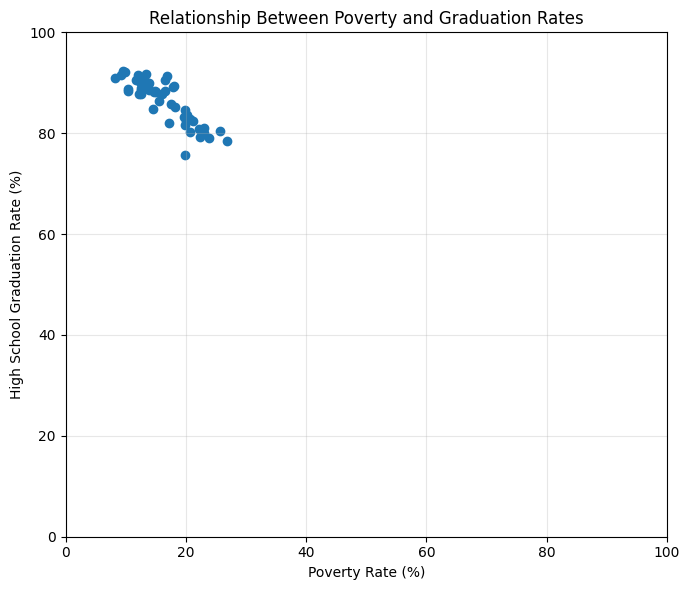

In [12]:
merged = (pct_poverty_by_state
          .merge(pct_completed_hs_by_state, on="State"))

plt.figure(figsize=(7,6))
plt.scatter(merged["Poverty Rate"], merged["High School Graduation Rate"])

plt.xlabel("Poverty Rate (%)")
plt.ylabel("High School Graduation Rate (%)")
plt.title("Relationship Between Poverty and Graduation Rates")
plt.grid(alpha=0.3)
plt.xlim(0, merged["Poverty Rate"].max()+2)
plt.ylim(0, 100)
plt.xlim(0, 100)
plt.tight_layout()
plt.show()


#### Now use a Seaborn .jointplot() with a Kernel Density Estimate (KDE) and/or scatter plot to visualise the same relationship

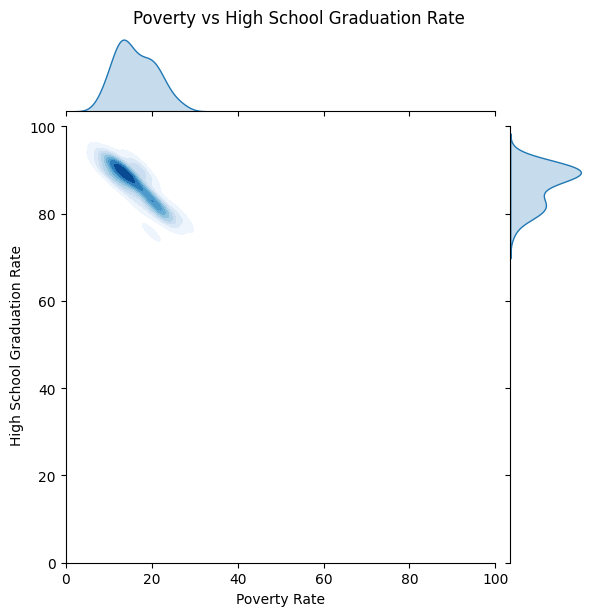

In [13]:
# Scatter + KDE contours
sns.jointplot(
    data=merged,
    x="Poverty Rate",
    y="High School Graduation Rate",
    kind="kde",      # can use "scatter", "kde", "reg", or "hex"
    fill=True,
    cmap="Blues"
)

plt.ylim(0, 100)
plt.xlim(0, 100)
plt.suptitle("Poverty vs High School Graduation Rate", y=1.02)
plt.show()

#### Seaborn's `.lmplot()` or `.regplot()` to show a linear regression between the poverty ratio and the high school graduation ratio.

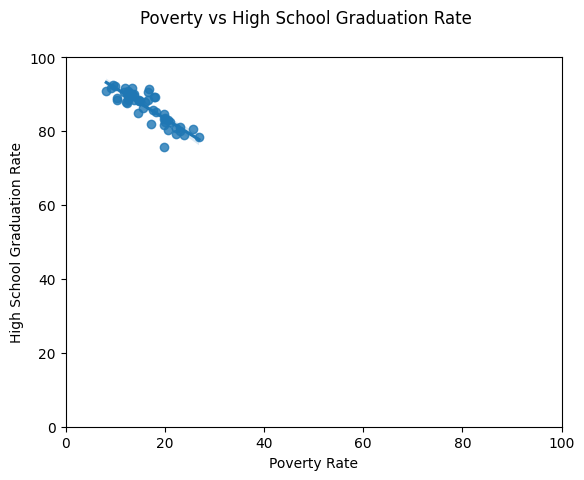

In [14]:
# Scatter + KDE contours
sns.regplot(
    data=merged,
    x="Poverty Rate",
    y="High School Graduation Rate"
)
plt.ylim(0, 100)
plt.xlim(0, 100)
plt.suptitle("Poverty vs High School Graduation Rate")
plt.show()

In all plots, as the poverty rate increases, the high school graduation rate decreases. States with low poverty (below ~15%) tend to have high graduation rates (90%+). States with high poverty (20%+) show lower graduation rates (75–85%).

The cluster is tight, suggesting a strong negative correlation. The density plot (2nd image) confirms most states fall in a range of 10–20% poverty and 80–90% graduation.

A few states with ~20% poverty still manage mid-to-high 80% graduation rates, showing that local education policy and support systems can offset poverty to some extent. Conversely, some states with moderate poverty still underperform on graduation, suggesting additional systemic issues (funding, teacher shortages, etc.).

# Create a Bar Chart with Subsections Showing the Racial Makeup of Each US State

Visualise the share of the white, black, hispanic, asian and native american population in each US State using a bar chart with sub sections.

In [15]:
df_share_race_city.columns = ['State', 'City', 'share_white', 'share_black', 'share_native_american', 'share_asian', 'share_hispanic']

# Convert share columns to numeric, coercing errors
for col in ['share_white', 'share_black', 'share_native_american', 'share_asian', 'share_hispanic']:
    df_share_race_city[col] = pd.to_numeric(df_share_race_city[col], errors='coerce')

df_race_by_state = df_share_race_city.groupby('State')[['share_white', 'share_black', 'share_native_american', 'share_asian', 'share_hispanic']].mean().reset_index()

fig = px.bar(df_race_by_state,
             x='State',
             y=['share_white', 'share_black', 'share_native_american', 'share_asian', 'share_hispanic'],
             title='Racial Makeup of Each US State')
fig.show()

Most states have a majority **White** population (blue bars), often making up **70%–90%** of the state population. States in the Midwest (e.g., **Iowa, North Dakota, South Dakota, Vermont, Maine**) show some of the **highest White shares**, with very small minority populations.

**Southern states** such as **Mississippi, Georgia, South Carolina, Alabama, and Louisiana** show **large Black populations** (red segments). These states often have **20–35% Black populations**, reflecting historic settlement patterns.

**New Mexico and Texas** stand out with very **high Hispanic shares** (orange segments). Other southwestern states like **California, Arizona, and Nevada** also have significant Hispanic populations. In **New Mexico**, Hispanics may make up the **largest share**, rivaling or exceeding the White population.

**Alaska, Oklahoma, New Mexico, Arizona, and South Dakota** show larger **Native American populations** (green segments). This reflects both tribal homelands and reservation areas.

**Hawaii** is unique, with a very large **Asian population** (purple segment) — in fact, Asians are the **largest group** there. Other states with noticeable Asian populations include **California, New York, and New Jersey**.

**Least diverse states:** Mostly rural, northern states like **Maine, Vermont, New Hampshire, West Virginia, and Montana**, which are overwhelmingly White. **Most diverse states:** **Hawaii, California, Texas, New Mexico, and Nevada**, which have large shares of Hispanic, Asian, and/or Native American populations.


# Create a Chart Comparing the Total Number of Deaths of Men and Women

Use `df_fatalities` to illustrate how many more men are killed compared to women.

In [16]:
# Count number of fatalities by gender
gender_counts = df_fatalities["gender"].value_counts().reset_index()
gender_counts.columns = ["Gender", "Deaths"]

# Bar chart
fig = px.bar(
    gender_counts,
    x="Gender",
    y="Deaths",
    text="Deaths",
    color="Gender",
    title="Total Number of Deaths of Men and Women",
    labels={"Deaths": "Number of Deaths"}
)

fig.update_traces(textposition="outside")
fig.show()

The number of male deaths is much higher than female deaths.

# Create a Box Plot Showing the Age and Manner of Death

Break out the data by gender using `df_fatalities`. Is there a difference between men and women in the manner of death?

In [17]:
fig = px.box(df_fatalities,
             x="manner_of_death",
             y="age",
             color="gender",
             title="Age and Manner of Death by Gender")
fig.show()

**Most cases** fall under the category **“shot”** for both men and women. **“Shot and tasered”** cases are fewer but follow a similar age pattern.

For both men and women, the **median age is around 30–40 years**. The **interquartile range (IQR)** (middle 50% of cases) mostly spans **mid-20s to mid-40s**. There are **outliers at very young ages (close to 0)** and at **older ages (70–90+)**, especially for men.

**Men (blue):** Show a slightly wider spread of ages compared to women. Have more **extreme outliers**, including individuals above 80 years.

**Women (red):** Median ages are quite close to men’s, but distributions are **slightly narrower** (less spread). Outliers are present, but fewer in number compared to men.

Deaths (whether by shooting or shooting with tasering) **primarily affect younger to middle-aged adults**. **Men are disproportionately represented** (consistent with the earlier total deaths chart). The presence of **both very young and elderly victims** highlights that while most are adults, the phenomenon affects all age groups.

Victims are most often in their **30s–40s**. Men have a **broader age range** of victims, including more elderly outliers. Women’s cases are **less frequent** and more tightly clustered around the 30–40 age group.


# Were People Armed?

In what percentage of police killings were people armed? Create chart that show what kind of weapon (if any) the deceased was carrying. How many of the people killed by police were armed with guns versus unarmed?

In [18]:
# Count number of fatalities
df_fatalities['armed_or_unarmed'] = df_fatalities['armed'].apply(lambda x: 'unarmed' if x == 'unarmed' else 'armed')
armed_counts = df_fatalities["armed_or_unarmed"].value_counts().reset_index()
armed_counts.columns = ["Armed", "Deaths"]

# Bar chart
fig = px.bar(
    armed_counts,
    x="Armed",
    y="Deaths",
    text="Deaths",
    color="Armed",
    title="Were People Armed?"
)

fig.update_traces(textposition="outside")
fig.show()

The vast majority of people (over 90%) were armed with some type of weapon when killed. A smaller, but still significant, number of people were unarmed.

In [19]:
# Count number of fatalities
weapon_counts = df_fatalities[df_fatalities["armed"] != "unarmed"]["armed"].value_counts().reset_index()
weapon_counts.columns = ["Weapon", "Deaths"]

# Bar chart
fig = px.bar(
    weapon_counts,
    x="Weapon",
    y="Deaths",
    text="Deaths",
    color="Weapon",
    title="What Kind of Weapons Were the Deceased Carrying?"
)

fig.update_traces(textposition="outside")
fig.show()

The majority of cases involve people carrying guns (1396 deaths).

The second most common weapon is a knife (373 deaths), followed by vehicles (177), and cases marked as undetermined (117).

Other weapon types (e.g., toy weapons, machetes, Tasers, pipes, bats, etc.) appear in much smaller numbers.

A long tail of rare items exists (e.g., pen, fireworks, pickaxe, etc.), each involved in only 1–2 deaths.

This shows that most fatal encounters involve firearms, with knives and vehicles far behind. While there is diversity in weapon types, the overwhelming majority are concentrated in just a few categories.

# How Old Were the People Killed?

Work out what percentage of people killed were under 25 years old.  

In [20]:
df_fatalities['age_category'] = df_fatalities['age'].apply(lambda x: 'under 25' if x < 25 else '25 or older')
age_counts = df_fatalities["age_category"].value_counts().reset_index()
age_counts.columns = ["Age", "Deaths"]

# Bar chart
fig = px.bar(
    age_counts,
    x="Age",
    y="Deaths",
    text="Deaths",
    color="Age",
    title="How Old Were the People Killed?"
)

fig.update_traces(textposition="outside")
fig.show()

The majority (about 79%) of people killed were 25 or older, while around 21% were under 25. This suggests that police killings disproportionately involve adults rather than younger individuals, though a substantial minority are still under 25.

Create a histogram and KDE plot that shows the distribution of ages of the people killed by police.

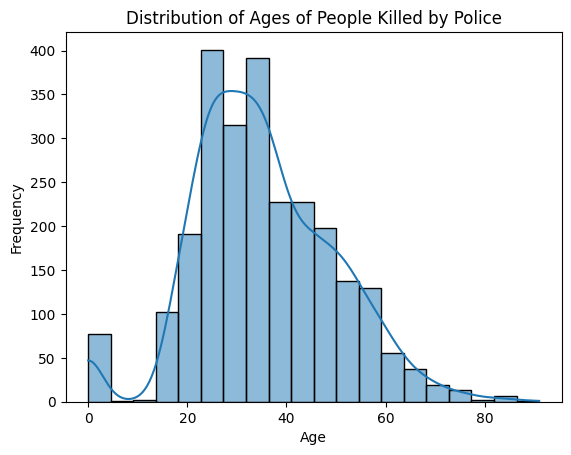

In [21]:
sns.histplot(data=df_fatalities, x="age", kde=True, bins=20)
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Distribution of Ages of People Killed by Police")
plt.show()

The distribution is concentrated in early adulthood (ages 20–40).

The peak frequency is in the mid-20s to early 30s.

There are fewer deaths among children and the elderly, though some cases exist at both extremes.

After age 40, the frequency declines steadily, with very few cases over 70.

This shows that most victims are young to middle-aged adults, particularly between their 20s and 30s, aligning with the broader adult dominance shown in the first chart. The long right tail reflects that killings still occur at older ages, but they are much less frequent.

# Race of People Killed

Create a chart that shows the total number of people killed by race.

In [22]:
df_fatalities["race"] = df_fatalities["race"].apply(lambda x: "O" if x == 0 else x)
race_counts = df_fatalities["race"].value_counts().reset_index()
race_counts.columns = ["Race", "Deaths"]

# Bar chart
fig = px.bar(
    race_counts,
    x="Race",
    y="Deaths",
    text="Deaths",
    color="Race",
    title="Race of People Killed"
)

fig.update_traces(textposition="outside")
fig.show()

Interpretation

Absolute numbers:
Most people killed are White, followed by Black and Hispanic individuals.

Proportional context:
Since White people make up the majority of the U.S. population, their absolute numbers are expected to be higher.
However, Black and Native American deaths are disproportionately high relative to their share of the U.S. population.

Black people (~13% of the U.S. population) represent over 20% of deaths here.

Native Americans (~1% of the population) also appear overrepresented given 31 deaths.

Key Takeaway

While White individuals make up the largest number of deaths in raw counts, the data suggests a disproportionate impact on minority groups, particularly Black and Native American people, when adjusted for population size.

# Mental Illness and Police Killings

What percentage of people killed by police have been diagnosed with a mental illness?

In [23]:
mental_illness_counts = df_fatalities["signs_of_mental_illness"].value_counts().reset_index()
mental_illness_counts.columns = ["Mental Illness", "Deaths"]

# Bar chart
fig = px.bar(
    mental_illness_counts,
    x="Mental Illness",
    y="Deaths",
    text="Deaths",
    color="Mental Illness",
    title="Mental Illness and Police Killings"
)

fig.update_traces(textposition="outside")
fig.show()

Most victims (about 75%) were not reported to have a mental illness. It suggests that the majority of cases involve people without a diagnosed or noted mental health condition.

A significant minority (about 25%) did have mental illness. This is notable because the prevalence of serious mental illness in the general U.S. adult population is much lower (roughly 5–6%). That means people with mental illness appear to be overrepresented among those killed by police compared to their share of the population.

While most people killed by police did not have mental illness, the data suggests that individuals with mental illness are disproportionately affected.

This could point to gaps in crisis intervention, de-escalation practices, or access to mental health services.

# In Which Cities Do the Most Police Killings Take Place?

Create a chart ranking the top 10 cities with the most police killings. Which cities are the most dangerous?  

In [24]:
df_fatalities

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,armed_or_unarmed,age_category
0,3,Tim Elliot,02/01/15,shot,gun,53.00,M,A,Shelton,WA,True,attack,Not fleeing,False,armed,25 or older
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.00,M,W,Aloha,OR,False,attack,Not fleeing,False,armed,25 or older
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.00,M,H,Wichita,KS,False,other,Not fleeing,False,unarmed,under 25
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.00,M,W,San Francisco,CA,True,attack,Not fleeing,False,armed,25 or older
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.00,M,H,Evans,CO,False,attack,Not fleeing,False,armed,25 or older
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2530,2822,Rodney E. Jacobs,28/07/17,shot,gun,31.00,M,O,Kansas City,MO,False,attack,Not fleeing,False,armed,25 or older
2531,2813,TK TK,28/07/17,shot,vehicle,0.00,M,O,Albuquerque,NM,False,attack,Car,False,armed,under 25
2532,2818,Dennis W. Robinson,29/07/17,shot,gun,48.00,M,O,Melba,ID,False,attack,Car,False,armed,25 or older
2533,2817,Isaiah Tucker,31/07/17,shot,vehicle,28.00,M,B,Oshkosh,WI,False,attack,Car,True,armed,25 or older


In [25]:
city_counts = df_fatalities["city"].value_counts().reset_index()
city_counts.columns = ["City", "Deaths"]

# Bar chart
fig = px.bar(
    city_counts.sort_values(by='Deaths', ascending=False).head(10),
    x="City",
    y="Deaths",
    text="Deaths",
    color="City",
    title="Top 10 Cities with Most Police Killings"
)

fig.update_traces(textposition="outside")
fig.show()

With **39 deaths**, Los Angeles stands out as the city with the highest number of police killings, significantly above the others.

Phoenix (**31**), Houston (**27**), and Chicago (**25**) also have notably high numbers. These are all large cities with high populations, which suggests a link between city size and number of incidents.

After Los Angeles, the numbers drop by 8 deaths to Phoenix. By the time you reach St. Louis (**15 deaths**), the total is less than half of Los Angeles.

The list includes cities across different regions:

  * **West**: Los Angeles, Phoenix, Las Vegas
  * **South**: Houston, San Antonio, Austin, Miami
  * **Midwest**: Chicago, Columbus, St. Louis
This indicates that the issue is not isolated to one region of the country.

High numbers may correlate with **larger populations, higher crime rates, and heavier police presence**, but they also highlight **systemic concerns about policing practices** in urban centers. It shows that police killings are concentrated in major cities rather than spread evenly across smaller towns.


# Create a Choropleth Map of Police Killings by US State

Which states are the most dangerous? Compare your map with your previous chart. Are these the same states with high degrees of poverty?

In [26]:
fatalities_by_state = df_fatalities.groupby('state').size().reset_index(name='Deaths')

fig = px.choropleth(fatalities_by_state,
                    locations='state',
                    locationmode='USA-states',
                    color='Deaths',
                    scope='usa',
                    color_continuous_scale="Viridis",
                    title='Police Killings by US State')
fig.show()

Looking at the choropleth map of police killings by state, we can see that states with higher populations like California, Texas, and Florida have a higher number of police killings.

When comparing this map to the poverty rate map, there seems to be some overlap. States with higher poverty rates such as Mississippi, Arkansas, and Louisiana also appear to have a relatively high number of police killings, although the relationship is not as strong as the correlation between poverty and high school graduation rates. It's important to consider that population size is a major factor in the total number of police killings, and a per capita analysis might reveal a different picture.

# Number of Police Killings Over Time

Analyse the Number of Police Killings over Time. Is there a trend in the data?

In [27]:
df_fatalities['date'] = pd.to_datetime(df_fatalities['date'], format='%d/%m/%y', errors='coerce')

In [28]:
fatalities_over_time = df_fatalities.groupby(df_fatalities['date'].dt.to_period('M')).size().reset_index(name='Deaths')
fatalities_over_time['date'] = fatalities_over_time['date'].astype(str)

fig = px.line(fatalities_over_time,
              x='date',
              y='Deaths',
              title='Number of Police Killings Over Time (Monthly)')
fig.show()

The number of killings is not steady — it rises and falls significantly across months. Peaks occur around **mid-2015 (July \~104 deaths)**, **early 2016 (March \~92 deaths)**, and **early 2017 (February \~100 deaths)**. Lows occur in **mid-2015 (June \~65 deaths)**, **spring 2016 (April \~73 deaths)**, and **spring 2017 (April \~67 deaths)**.

Over the \~2.5 years shown, the overall numbers hover between \~65 and \~105 deaths monthly. While there are sharp spikes, the average level does not show a consistent increase or decrease.

There may be **seasonal cycles** — peaks in summer or early winter, and dips in spring. For example, high counts around mid-2015, mid-2016, and early 2017, with lower counts in April–June each year.

The data suggests that the number of police killings in the U.S. remained **highly variable but relatively stable on average** over this period, with occasional spikes that might relate to particular events or broader conditions.


# Rate of Death by Race

Find the share of each race in the top 10 cities. Contrast this with the top 10 cities of police killings to work out the rate at which people are killed by race for each city.

In [58]:
# Define a consistent color mapping
race_color_map = {
    "share_white": "lightgray",
    "share_black": "black",
    "share_native_american": "brown",
    "share_asian": "orange",
    "share_hispanic": "green",
    "W": "lightgray",
    "B": "black",
    "N": "brown",
    "A": "orange",
    "H": "green",
    "O": "blue"
}

In [59]:
# Identify the top 10 cities with the most police killings
top_10_cities = df_fatalities["city"].value_counts().head(10).index.tolist()

# Clean city names in the top_10_cities list
cleaned_top_10_cities = [city.lower().replace(' city', '').replace(' town', '').replace(' cdp', '').replace(' ', '') for city in top_10_cities]

# Clean city names in both dataframes
df_share_race_city['cleaned_city'] = df_share_race_city['City'].str.lower().str.replace(' city', '', regex=False).str.replace(' town', '', regex=False).str.replace(' cdp', '', regex=False).str.replace(' ', '', regex=False)
df_fatalities['cleaned_city'] = df_fatalities['city'].str.lower().str.replace(' city', '', regex=False).str.replace(' town', '', regex=False).str.replace(' cdp', '', regex=False).str.replace(' ', '', regex=False)

# Filter the race share data for the top 10 cities using cleaned city names
df_share_race_top_cities = df_share_race_city[df_share_race_city["cleaned_city"].isin(cleaned_top_10_cities)]

cols = ['share_white', 'share_black', 'share_native_american', 'share_asian', 'share_hispanic']

# Calculate the average share of each race in the top 10 cities
df_race_distribution_top_cities = df_share_race_top_cities.groupby('cleaned_city')[cols].mean().reset_index()

# Normalize so that each city sums to 100%
df_race_distribution_top_cities[cols] = (
    df_race_distribution_top_cities[cols]
    .div(df_race_distribution_top_cities[cols].sum(axis=1), axis=0) * 100
)

# Melt the DataFrame for plotting
df_melted_race_share = df_race_distribution_top_cities.melt(
    id_vars='cleaned_city',
    value_vars=cols,
    var_name='Race',
    value_name='Share'
)

# Chart for Race Share in Top 10 Cities
fig_race_share = px.bar(
    df_melted_race_share,
    x="cleaned_city",
    y="Share",
    color="Race",
    title="Share of Each Race in Top 10 Cities with Most Police Killings",
    color_discrete_map=race_color_map,
    width = 1500,
    height = 600
)
fig_race_share.show()


# Filter the fatalities data for the top 10 cities using cleaned city names
df_fatalities_top_cities = df_fatalities[df_fatalities["cleaned_city"].isin(cleaned_top_10_cities)]

# Count deaths by race in the top 10 cities
df_deaths_by_race_top_cities = df_fatalities_top_cities.groupby(["cleaned_city", "race"]).size().reset_index(name="Deaths")

# Chart for Deaths by Race in Top 10 Cities
fig_deaths_by_race = px.bar(
    df_deaths_by_race_top_cities,
    x="cleaned_city",
    y="Deaths",
    color="race",
    title="Number of Deaths by Race in Top 10 Cities with Most Police Killings",
    color_discrete_map=race_color_map,
    width = 1500,
    height = 600
)
fig_deaths_by_race.show()

While White and Hispanic populations make up the largest demographic shares in most of the top 10 cities with the most police killings, the number of deaths shows a disproportionate impact on Black and Hispanic individuals. Black communities, in particular, experience significantly higher deaths relative to their population share, highlighting clear racial disparities in police violence across these cities.